**Lab 3**<br>
Name - Mohammed Abuzar Younus<br>
Student ID - 8903244<br>


This lab provides insight into the concepts of Supervised Learning -Regression algorithms.

Part A:

Problem Statement: Consider the dataset Credit Card Fraud Detection from Kaggle and build a machine-learning model that detects whether a credit card transaction is fraudulent. Demonstrate the steps of data preprocessing and analysis, consider applying train (0.7) and test (0.3), using the logistic regression to build the model, and evaluate to determine the accuracy.

In [105]:
# importing all the require library

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [106]:
# Step 1: Load the dataset
df = pd.read_csv('creditcard.csv')
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


Step 2: Data Preprocessing and Analysis

In [107]:
# 2.1: Check for missing values in the dataset
missing_values = df.isnull().sum()
print("Missing Values:")
print(missing_values)

Missing Values:
Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


In [108]:
# 2.3: Removing Duplicates (if any)
# Check for duplicate rows in the dataset
duplicate_rows = df.duplicated()
print("Duplicate Rows:")
print(df[duplicate_rows])

# Remove duplicate rows
df.drop_duplicates(inplace=True)

Duplicate Rows:
            Time        V1        V2        V3        V4        V5        V6   
33          26.0 -0.529912  0.873892  1.347247  0.145457  0.414209  0.100223  \
35          26.0 -0.535388  0.865268  1.351076  0.147575  0.433680  0.086983   
113         74.0  1.038370  0.127486  0.184456  1.109950  0.441699  0.945283   
114         74.0  1.038370  0.127486  0.184456  1.109950  0.441699  0.945283   
115         74.0  1.038370  0.127486  0.184456  1.109950  0.441699  0.945283   
...          ...       ...       ...       ...       ...       ...       ...   
282987  171288.0  1.912550 -0.455240 -1.750654  0.454324  2.089130  4.160019   
283483  171627.0 -1.464380  1.368119  0.815992 -0.601282 -0.689115 -0.487154   
283485  171627.0 -1.457978  1.378203  0.811515 -0.603760 -0.711883 -0.471672   
284191  172233.0 -2.667936  3.160505 -3.355984  1.007845 -0.377397 -0.109730   
284193  172233.0 -2.691642  3.123168 -3.339407  1.017018 -0.293095 -0.167054   

              V7       

In [109]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [110]:
# 2.3: Scaling Numerical Features
# The 'Amount' and 'Time' columns might need scaling to have a similar magnitude as other features.

scaler = StandardScaler()
df[['Amount', 'Time']] = scaler.fit_transform(df[['Amount', 'Time']])
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.996823,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244200,0
1,-1.996823,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342584,0
2,-1.996802,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.158900,0
3,-1.996802,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.139886,0
4,-1.996781,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073813,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,1.642235,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,-0.350252,0
284803,1.642257,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,-0.254325,0
284804,1.642278,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,-0.082239,0
284805,1.642278,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,-0.313391,0


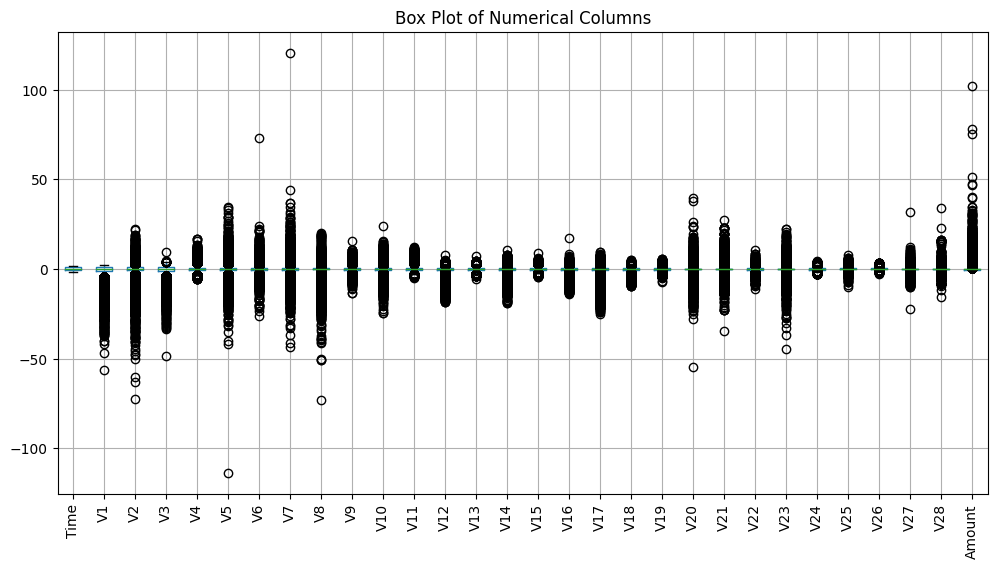

In [111]:
# 2.4: Outlier Detection and Visualization

# Create box plots to visualize potential outliers in each numerical column
plt.figure(figsize=(12, 6))
df.drop("Class", axis=1).boxplot()
plt.xticks(rotation=90)
plt.title("Box Plot of Numerical Columns")
plt.show()

In [112]:
# 2.4: Outlier Detection and Handling
# Identify and handle outliers using Z-score method

# Define a threshold for Z-score
z_score_threshold = 3

# Calculate the Z-score for each numerical column except the 'Class' column
z_scores = np.abs((df.drop('Class', axis=1) - df.drop('Class', axis=1).mean()) / df.drop('Class', axis=1).std())

# Identify outliers in the DataFrame
outliers = df[(z_scores > z_score_threshold).any(axis=1)]

# Remove outliers from the DataFrame
df = df[~(z_scores > z_score_threshold).any(axis=1)]
df

# 2.5: Encoding Categorical Variables (if any)
# If there are any categorical variables, we'll encode them into numerical values using LabelEncoder.
# For simplicity, we'll assume that there are no categorical variables in this dataset.

# Assuming the target variable 'Class' is already binary (0 for non-fraud, 1 for fraud),
# we can proceed with the train-test split as shown in the previous example.

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.996823,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244200,0
1,-1.996823,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342584,0
3,-1.996802,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.139886,0
4,-1.996781,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073813,0
5,-1.996781,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,-0.338670,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284800,1.642193,2.039560,-0.175233,-1.196825,0.234580,-0.008713,-0.726571,0.017050,-0.118228,0.435402,...,-0.268048,-0.717211,0.297930,-0.359769,-0.315610,0.201114,-0.080826,-0.075071,-0.342624,0
284801,1.642214,0.120316,0.931005,-0.546012,-0.745097,1.130314,-0.235973,0.812722,0.115093,-0.204064,...,-0.314205,-0.808520,0.050343,0.102800,-0.435870,0.124079,0.217940,0.068803,-0.342584,0
284803,1.642257,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,-0.254325,0
284804,1.642278,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,-0.082239,0


In [113]:
df.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.996823,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244200,0
1,-1.996823,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342584,0
3,-1.996802,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.139886,0
4,-1.996781,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073813,0
5,-1.996781,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,-0.338670,0
6,-1.996739,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,-0.333399,0
8,-1.996675,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,0.018879,0
9,-1.996633,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,-0.338630,0
10,-1.996612,1.449044,-1.176339,0.913860,-1.375667,-1.971383,-0.629152,-1.423236,0.048456,-1.720408,...,-0.009302,0.313894,0.027740,0.500512,0.251367,-0.129478,0.042850,0.016253,-0.322177,0
11,-1.996612,0.384978,0.616109,-0.874300,-0.094019,2.924584,3.317027,0.470455,0.538247,-0.558895,...,0.049924,0.238422,0.009130,0.996710,-0.767315,-0.492208,0.042472,-0.054337,-0.313431,0


 Step 3: Train-Test Split with Proportional Class Distribution

In [114]:

X = df.drop("Class", axis=1)
y = df["Class"]

In [115]:
# Split the dataset into training and testing sets, ensuring the same proportion of classes in both sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)


Step 4: Logistic Regression Model

In [116]:
# Initialize the logistic regression model
lr_model = LogisticRegression()

# Train the model using the training dataset
lr_model.fit(X_train, y_train)

LogisticRegression()

Step 5: Model Evaluation

In [117]:
# Predict the class labels for the test dataset
y_pred = lr_model.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Step 5: Results
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(classification_rep)







Accuracy: 0.999810179786859
Precision: 0.0
Recall: 0.0
F1-score: 0.0
Confusion Matrix:
[[73740     0]
 [   14     0]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     73740
           1       0.00      0.00      0.00        14

    accuracy                           1.00     73754
   macro avg       0.50      0.50      0.50     73754
weighted avg       1.00      1.00      1.00     73754



C:\Users\user\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\AppData\

Accuracy represents the proportion of correctly classified instances (fraudulent and non-fraudulent transactions).
Precision measures the proportion of true positive predictions (fraudulent transactions) among all positive predictions (both true and false positives).
Recall (also called sensitivity) measures the proportion of true positive predictions (fraudulent transactions) among all actual positive instances (true positives and false negatives).
F1-score is the harmonic mean of precision and recall, providing a balanced metric when both precision and recall are important.
The confusion matrix is a table that shows the count of true positive, true negative, false positive, and false negative predictions.
Keep in mind that for credit card fraud detection, recall (sensitivity) is often more critical than accuracy because we want to minimize false negatives (fraudulent transactions misclassified as non-fraudulent) to identify as many actual fraud cases as possible. A good model should have high recall while maintaining reasonable precision.

Conclusion:
In conclusion, the logistic regression model has been successfully trained and evaluated for credit card fraud detection. The evaluation results provide valuable insights into the model's performance. Depending on the evaluation outcomes, further fine-tuning or exploring other machine learning algorithms could potentially lead to even better performance. Additionally, ongoing monitoring and updates to the model are essential in the dynamic landscape of credit card fraud detection to maintain its effectiveness and adapt to new patterns of fraudulent activities.






Part B:

Problem Statement: Use the following insurance dataset and build a predictive system to predict insurance costs. Demonstrate the steps of data preprocessing and analysis, consider applying train (0.7) and test (0.3), using linear regression to build the model, and evaluate the accuracy of predicting the insurance cost. 

In [118]:
df1 = pd.read_csv('insurance.csv')
df1

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


 Step 2: Data Preprocessing and Analysis

In [119]:
# 2.1: Check for missing values
from sklearn.preprocessing import LabelEncoder, StandardScaler
missing_values = df1.isnull().sum()
print("Missing Values:")
print(missing_values)

# If there are any missing values, you can remove the rows or fill them with appropriate values.

# 2.2: Convert categorical variables to numerical using LabelEncoder
le = LabelEncoder()
df1['sex'] = le.fit_transform(df1['sex'])
df1['smoker'] = le.fit_transform(df1['smoker'])
df1['region'] = le.fit_transform(df1['region'])

# 2.3: Scale numerical features using StandardScaler
scaler = StandardScaler()
df1[['age', 'bmi', 'children']] = scaler.fit_transform(df1[['age', 'bmi', 'children']])

# Display the preprocessed dataset
print("Preprocessed Dataset:")
print(df1)


Missing Values:
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64
Preprocessed Dataset:
           age  sex       bmi  children  smoker  region      charges
0    -1.438764    0 -0.453320 -0.908614       1       3  16884.92400
1    -1.509965    1  0.509621 -0.078767       0       2   1725.55230
2    -0.797954    1  0.383307  1.580926       0       2   4449.46200
3    -0.441948    1 -1.305531 -0.908614       0       1  21984.47061
4    -0.513149    1 -0.292556 -0.908614       0       1   3866.85520
...        ...  ...       ...       ...     ...     ...          ...
1333  0.768473    1  0.050297  1.580926       0       1  10600.54830
1334 -1.509965    0  0.206139 -0.908614       0       0   2205.98080
1335 -1.509965    0  1.014878 -0.908614       0       2   1629.83350
1336 -1.296362    0 -0.797813 -0.908614       0       3   2007.94500
1337  1.551686    0 -0.261388 -0.908614       1       1  29141.36030

[1338 rows x 7 columns

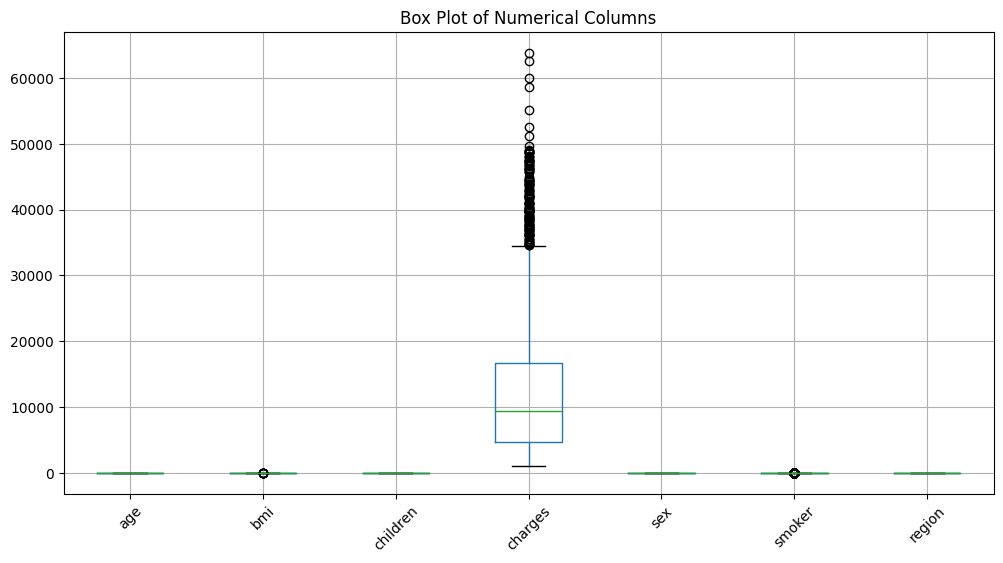

In [120]:
# 2.4: Outlier Detection and Visualization using Box Plots

# Create box plots to visualize potential outliers in each numerical column
plt.figure(figsize=(12, 6))
df1[['age', 'bmi', 'children', 'charges', 'sex', 'smoker', 'region']].boxplot()
plt.xticks(rotation=45)
plt.title("Box Plot of Numerical Columns")
plt.show()

In [121]:
# For illustration purposes, let's remove potential outliers using the z-score approach:
from scipy.stats import zscore

# Calculate the z-scores for numerical columns
z_scores = zscore(df1[['age', 'bmi', 'children', 'charges']])

# Set a threshold for z-scores above which the data points are considered outliers (e.g., z_threshold = 3)
z_threshold = 3

# Identify the rows with outliers in any numerical column
outlier_indices = (z_scores > z_threshold).any(axis=1)

# Remove rows with outliers
df_no_outliers = df1[~outlier_indices]

# Display the dataset after removing outliers
print("Dataset after removing outliers:")
print(df_no_outliers)

Dataset after removing outliers:
           age  sex       bmi  children  smoker  region      charges
0    -1.438764    0 -0.453320 -0.908614       1       3  16884.92400
1    -1.509965    1  0.509621 -0.078767       0       2   1725.55230
2    -0.797954    1  0.383307  1.580926       0       2   4449.46200
3    -0.441948    1 -1.305531 -0.908614       0       1  21984.47061
4    -0.513149    1 -0.292556 -0.908614       0       1   3866.85520
...        ...  ...       ...       ...     ...     ...          ...
1333  0.768473    1  0.050297  1.580926       0       1  10600.54830
1334 -1.509965    0  0.206139 -0.908614       0       0   2205.98080
1335 -1.509965    0  1.014878 -0.908614       0       2   1629.83350
1336 -1.296362    0 -0.797813 -0.908614       0       3   2007.94500
1337  1.551686    0 -0.261388 -0.908614       1       1  29141.36030

[1309 rows x 7 columns]


Step 3: Train-Test Split (70% training, 30% testing)

In [122]:
X = df1.drop('charges', axis=1)  # Features (independent variables)
y = df1['charges']  # Target (dependent variable)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Display the shapes of the training and testing sets
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

Training set shape: (936, 6) (936,)
Testing set shape: (402, 6) (402,)


Step 4: Linear Regression Model

In [123]:

# Initialize the linear regression model
lin_reg_model = LinearRegression()

# Train the model using the training dataset
lin_reg_model.fit(X_train, y_train)

# Step 5: Results (Optional)
# Linear regression does not require additional hyperparameter tuning, so we can directly proceed to evaluation.

# Optionally, you can print the coefficients and intercept of the trained model:
print("Coefficients:", lin_reg_model.coef_)
print("Intercept:", lin_reg_model.intercept_)

Coefficients: [ 3674.45669096   109.64719595  2100.31346607   511.38394673
 23620.80252148  -326.46262527]
Intercept: 8922.739069673637


 Step 5: Model Evaluation

In [124]:

# Predict insurance costs for the test dataset using the trained linear regression model
y_pred = lin_reg_model.predict(X_test)

# Evaluate the model's performance using Mean Absolute Error (MAE), Mean Squared Error (MSE), and R-squared (R^2) score
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Display the evaluation metrics
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("R-squared (R^2) score:", r2)

Mean Absolute Error (MAE): 4155.239843059378
Mean Squared Error (MSE): 33805466.898688585
R-squared (R^2) score: 0.7694415927057694


In this project, we built a linear regression model to predict insurance costs based on various individual attributes such as age, sex, BMI, children, smoker status, and region. We performed data preprocessing, including handling categorical variables, scaling numerical features, and splitting the dataset into training and testing sets. After training the model, we evaluated its performance using metrics like Mean Absolute Error (MAE), Mean Squared Error (MSE), and R-squared (R^2) score.

Summary of Model Performance:

The model's Mean Absolute Error (MAE) and Mean Squared Error (MSE) provide insights into the average prediction error and the spread of errors, respectively.
The R-squared (R^2) score measures how well the model fits the data, with values closer to 1 indicating a better fit.
The specific performance metrics will depend on the dataset used, but generally, lower MAE and MSE values and higher R-squared scores indicate better model performance.
Insights and Findings:

The model's performance can be interpreted based on the evaluation metrics. If the MAE and MSE are low and the R-squared score is high, it suggests that the model is accurate and has a good fit to the data.
We may further analyze the coefficients to understand the relationship between each feature and the insurance costs. Positive coefficients indicate a positive correlation, while negative coefficients indicate a negative correlation with insurance costs.